<a href="https://colab.research.google.com/github/leeIITM/AI-X-HORIZON/blob/main/ee23b013_task1_lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=RHGiXPuo_pI

In [ ]:
#imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
class LSTM(nn.Module):
  #create and initialise weight and bias tensors
  def __init__(self):
    super().__init__()

    torch.manual_seed(42)

    mean = torch.tensor(0.0)
    std = torch.tensor(1.0)

    #weights and biases for long-term remember gate --> how much of the long term memory should be retained
    self.wlr1 = nn.Parameter(torch.normal(mean = mean, std = std), requires_grad = True)
    self.wlr2 = nn.Parameter(torch.normal(mean = mean, std = std), requires_grad = True)
    self.blr1 = nn.Parameter(torch.tensor(0.), requires_grad = True)

    #weights and biases for potential-remember gate --> how much of potential memory should be added to the long term memory
    self.wpr1 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.wpr2 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.bpr1 = nn.Parameter(torch.tensor(0.), requires_grad=True)

    #weghts and biases for potential-remember gate --> to create the potential memory
    self.wp1 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.wp2 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.bp1 = nn.Parameter(torch.tensor(0.), requires_grad=True)

    #weights and biases for output gate --> how much of the output should be transferred to hidden state
    self.wo1 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.wo2 = nn.Parameter(torch.normal(mean=mean, std=std), requires_grad=True)
    self.bo1 = nn.Parameter(torch.tensor(0.), requires_grad=True)

  #to do the LSTM maths
  def lstm_unit(self, input_value, long_memory, short_memory):
    long_remember_percent = torch.sigmoid(torch.matmul(input_value, self.wlr1) + torch.matmul(long_memory, self.wlr2) + self.blr1)
    potential_remember_percent = torch.sigmoid(torch.matmul(input_value, self.wpr1) + torch.matmul(short_memory, self.wpr2) + self.bpr1)
    potential_memory = torch.tanh(torch.matmul(input_value, self.wp1) + torch.matmul(short_memory, self.wp2) + self.bp1)

    updated_long_memory = long_memory * long_remember_percent + potential_memory * potential_remember_percent
    output_percent = torch.sigmoid(torch.matmul(input_value, self.wo1) + torch.matmul(short_memory, self.wo2) + self.bo1)
    updated_short_memory = torch.tanh(updated_long_memory) * output_percent
    return ([updated_long_memory, updated_short_memory])

  #forward pass through unrolled LSTM
  def forward(self, input):
    long_memory = torch.zeros(input.shape[0], 1)
    short_memory = torch.zeros(input.shape[0], 1)

    for day in input:
      long_memory, short_memory = self.lstm_unit(day, long_memory, short_memory)

    return short_memory

  #training
  def model_train(model, train_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        for input_i, label_i in train_loader:
            optimizer.zero_grad()
            output_i = model(input_i)
            loss = criterion(output_i, label_i)
            loss.backward()
            optimizer.step()

            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


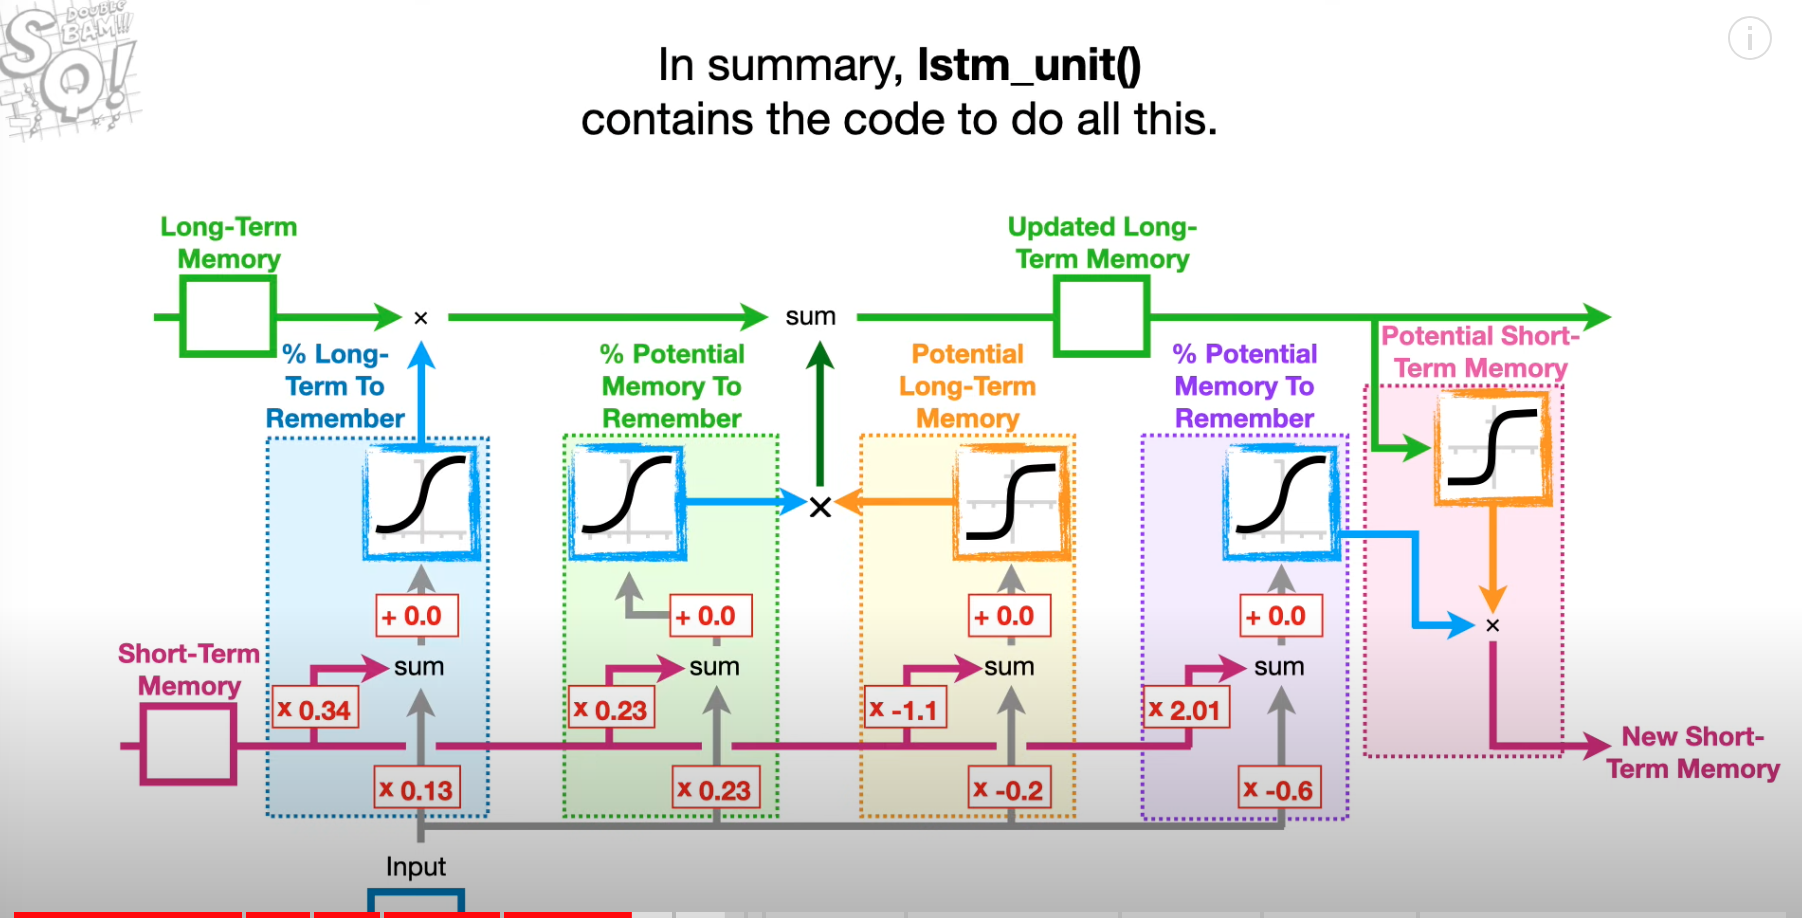

In [ ]:
df = pd.read_csv('Sunspots.csv', index_col = 'Date', parse_dates = True)
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


<Axes: xlabel='Date'>

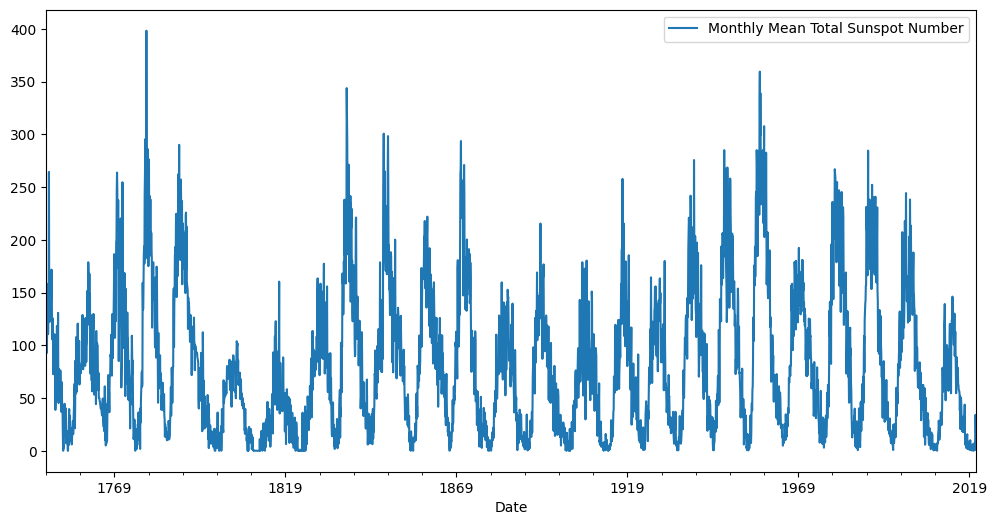

In [ ]:
df.plot(figsize = (12, 6))

In [ ]:
print(len(df))
print(df.isnull().any().sum())

3265
0


In [ ]:
#splitting data in ration 8:2
train = df.iloc[:2612]
test = df.iloc[2612:]

#splitting testing data into inputs and corresponding outputs
train_inputs = train.iloc[:, :-1].values
train_outputs = train.iloc[:, -1].values

#converting to PyTorch tensors
train_inputs_tensor = torch.tensor(train_inputs, dtype=torch.float32)
train_outputs_tensor = torch.tensor(train_outputs, dtype=torch.float32)

#creating a dataset and data loader
batch_size = 16
dataset = TensorDataset(train_inputs_tensor, train_outputs_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size)

In [ ]:
#creating and initializing the model
model = LSTM()

#traingn the model
model_train(model, train_loader)

NameError: name 'model_train' is not defined